In [45]:
import time
import random

In [5]:
import threading

In [2]:
#  Threading: - Used to speed up programs(but not necessary, with concurrency!!)
#  Concurrency : - Running blocks of code, in a particular order one after another.

In [34]:
def do_something(seconds:2):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping {seconds} seconds...'

In [35]:
#  Concurrency or Concurrent Code
start = time.perf_counter()
print(do_something(2))
print(do_something(2))
print(do_something(2))
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 2 second(s)...
Done Sleeping 2 seconds...
Sleeping 2 second(s)...
Done Sleeping 2 seconds...
Sleeping 2 second(s)...
Done Sleeping 2 seconds...
Finished in 6.02 second(s)


<p> Here we ran the code syncronously, and called the same function multiple times one after.<br>
When the function was sleeping, we waited first for it to finish sleeping then exited and then called the function again.
</p>

<ul>
<li>CPU bound tasks : Tasks that primarily use CPU processing. e.g: - Data Crunching, Arithmetic Operations etc.</li>
<li>I/O bound tasks: - Tasks that primarily use I/O processing. e.g.: - Reading and Writng from File System, I/O Operation, Network operations</li>
</ul>
<br>
Threading are useful only for I/O Operations. Threading can also slow down, due to thread mgmt.

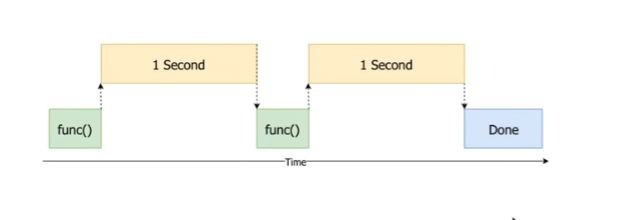

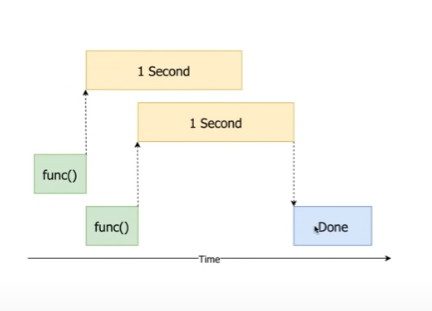

In [36]:
#  Don't put paranthesis, don't execute the function.
# Here we created multiple thread objects, but didn't execute the threads
sleep_seconds=2
t1= threading.Thread(target=do_something, args=(sleep_seconds,))
t2= threading.Thread(target=do_something, args=(sleep_seconds,))
start = time.perf_counter()
t1.start()
t2.start()
#  Here we do a join, to prevent the script to move the main thread.
# Here are main script is running on one thread, and when we created 2 different threads for functions, if we don't do a join, python starts to execute the first primary thread.
#  This will result in executing the finish first.
#  We can join threads that are created once.
t1.join()
t2.join()
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 2 second(s)...Sleeping 2 second(s)...

Finished in 2.01 second(s)


In [37]:
#  Running the Code multiple times, in a loop but concurrently 
start = time.perf_counter()
threads = []
sleep_seconds=1
#  _ is junk value.
for _ in range(10):
    t = threading.Thread(target=do_something, args=[5])
    t.start()
    # t.join()
    #  Here we can't use join because the next thread isn't created yet, so there is nothing to join. If we do a join here, then it will resut in a complete syncronous code  
    threads.append(t)

for thread in threads:
    thread.join()

finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')


Sleeping 5 second(s)...Sleeping 5 second(s)...

Sleeping 5 second(s)...
Sleeping 5 second(s)...
Sleeping 5 second(s)...
Sleeping 5 second(s)...
Sleeping 5 second(s)...
Sleeping 5 second(s)...Sleeping 5 second(s)...

Sleeping 5 second(s)...
Finished in 5.05 second(s)


In [ ]:
# In the new python version, we can do it in a better way
#  Thread Pool Executer: - Can use multi threads, or multi process also
import concurrent.futures

In [39]:
#  New method of running multiple threads......
start = time.perf_counter()
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit Function sets a function to be executed for running and returns an object that is the state of the function
    f1=executor.submit(do_something, 2)
    f2=executor.submit(do_something, 2)
    
    #  prints the results or returned value of the function
    print(f1.result())
    print(f2.result())
    
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 2 second(s)...
Sleeping 2 second(s)...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Finished in 2.02 second(s)


In [40]:
#  Running same function, multiple times, using loop
start = time.perf_counter()
with concurrent.futures.ThreadPoolExecutor() as executor:
    #  Collection of functions executed
    results =[executor.submit(do_something, 2) for _ in range(10)]
    for f in concurrent.futures.as_completed(results):
        print(f.result()) 
    
    
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Sleeping 2 second(s)...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Done Sleeping 2 seconds...
Finished in 2.05 second(s)


In [44]:
#  Running same function, multiple times, using loop
start = time.perf_counter()
with concurrent.futures.ThreadPoolExecutor() as executor:
    #  Collection of functions executed
    results =[executor.submit(do_something, i) for i in range(1, 10, 2)]
    for f in concurrent.futures.as_completed(results):
        print(f.result()) 
    
    
finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1 second(s)...
Sleeping 3 second(s)...
Sleeping 5 second(s)...
Sleeping 7 second(s)...
Sleeping 9 second(s)...
Done Sleeping 1 seconds...
Done Sleeping 3 seconds...
Done Sleeping 5 seconds...
Done Sleeping 7 seconds...
Done Sleeping 9 seconds...
Finished in 9.03 second(s)


In [46]:
#  Running same function, multiple times, using loop
start = time.perf_counter()
with concurrent.futures.ThreadPoolExecutor() as executor:
    #  Collection of functions executed
    results =[executor.submit(do_something, random.randint(1,10)) for i in range(1, 10, 2)]
    for f in concurrent.futures.as_completed(results):
        print(f.result())

finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 10 second(s)...
Sleeping 10 second(s)...
Sleeping 3 second(s)...
Sleeping 1 second(s)...
Sleeping 2 second(s)...
Done Sleeping 1 seconds...
Done Sleeping 2 seconds...
Done Sleeping 3 seconds...
Done Sleeping 10 seconds...
Done Sleeping 10 seconds...
Finished in 10.01 second(s)
